Hussein Hamie
500876254
AER 850 Machine Learning
Assignment 1

We Begin by importing the initial libraries for plotting and data preprocessing

In [139]:
# Importing of libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [140]:
# Function used to import datasets. The function saves X and Y Columns as Numpy arrays and reshapes them in 2D form.

def getdata(filename):
    with open (filename,'r') as csvfile:
        csvData = pd.read_csv(csvfile,header=None)
        #Ordering the data properly
        csvData.sort_values(csvData.columns[0],axis=0,inplace=True)
        print(csvData)
        X = csvData.iloc[:,[0]].to_numpy()
        Y = csvData.iloc[:,[1]].to_numpy()
        print(X)


    return X , Y

Importing all datasets using get data function and assigning X and Y respectively

In [141]:
X_test, Y_test = getdata("Dataset1/Dataset_1_test.csv")
X_train, Y_train = getdata("Dataset1/Dataset_1_train.csv")
X_valid, Y_valid = getdata("Dataset1/Dataset_1_valid.csv")

           0          1   2
31 -0.988770  -6.497606 NaN
23 -0.913618  -5.110324 NaN
32 -0.895417 -11.813734 NaN
3  -0.860443  -3.800950 NaN
2  -0.819361  -9.321124 NaN
37 -0.789856  -5.923314 NaN
11 -0.780743 -10.921434 NaN
49 -0.758574 -10.768728 NaN
24 -0.698714 -11.098282 NaN
6  -0.627858  -6.709161 NaN
39 -0.618156  -3.162021 NaN
48 -0.499098   2.344141 NaN
12 -0.488943 -10.539182 NaN
13 -0.458625  -3.586555 NaN
8  -0.427498  -3.513751 NaN
35 -0.414263  -6.832803 NaN
0  -0.335254  -2.953401 NaN
33 -0.300863   1.659256 NaN
17 -0.283256  -6.700334 NaN
44 -0.215044  -0.091022 NaN
21 -0.184763  -5.287415 NaN
18 -0.097897  -5.630283 NaN
40 -0.076718  -2.946125 NaN
27 -0.073859  -6.728111 NaN
5  -0.007729  -3.405798 NaN
1   0.122457  -5.836786 NaN
26  0.191167  -0.802697 NaN
36  0.194400  -4.639020 NaN
20  0.232616   0.908847 NaN
41  0.239000  -3.462470 NaN
9   0.352504  -3.073887 NaN
28  0.411078   5.010641 NaN
19  0.419778   1.357183 NaN
4   0.422628   2.100318 NaN
22  0.442216  -4.053

Now we plot all three data sets, so we can visualize the distribution we are trying to plot

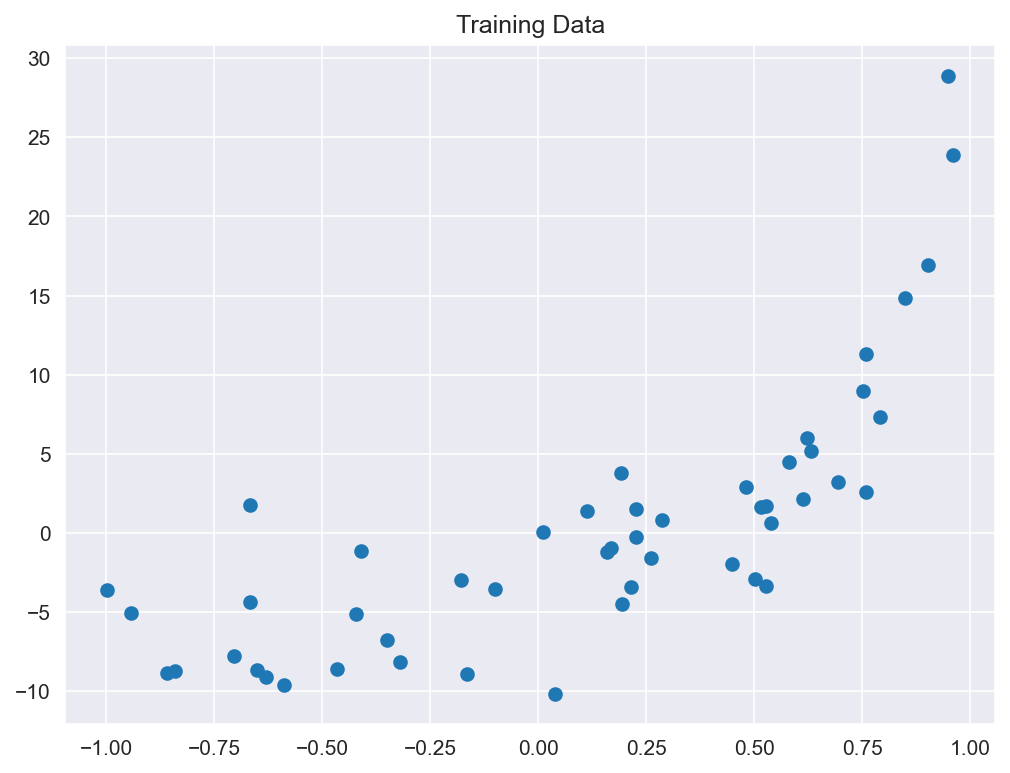

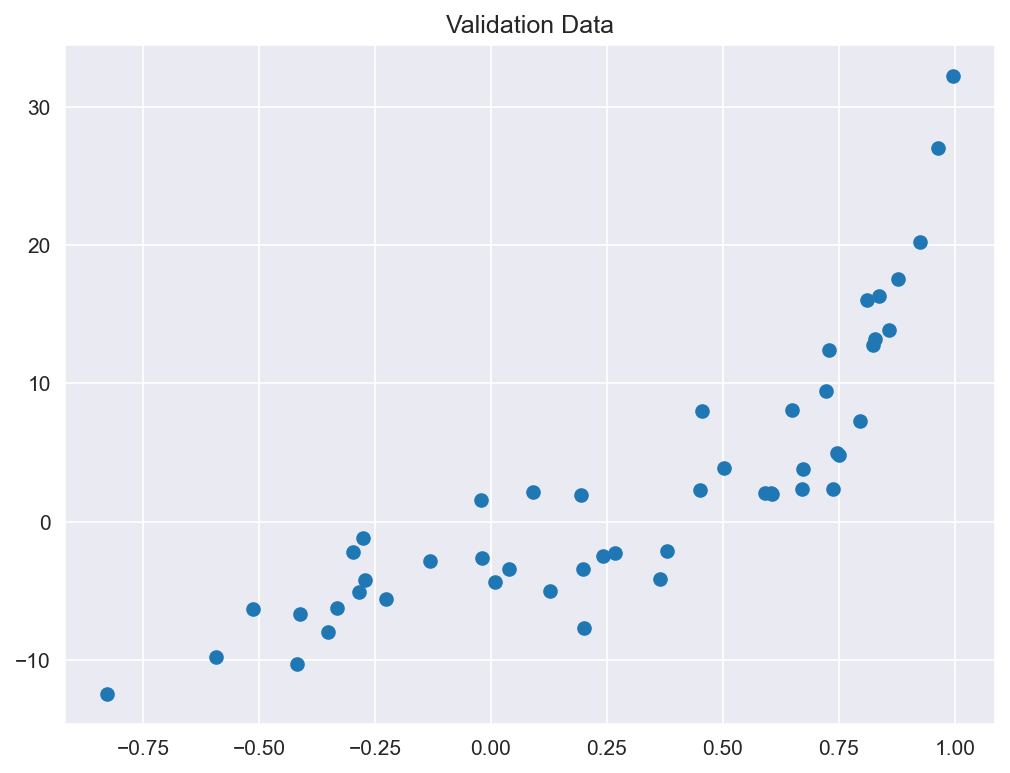

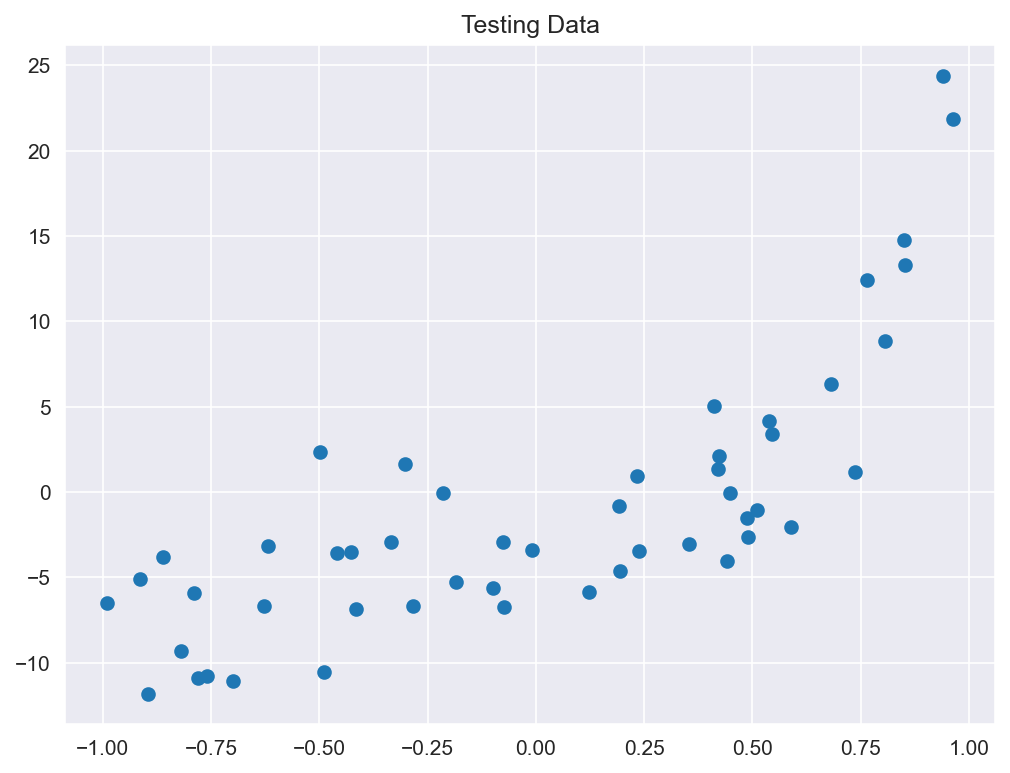

In [142]:
plt.figure(figsize=(8, 6), dpi=150)
plt.scatter(X_train,Y_train)
plt.title('Training Data')
plt.show()

plt.figure(figsize=(8, 6), dpi=150)
plt.scatter(X_valid,Y_valid)
plt.title('Validation Data')
plt.show()

plt.figure(figsize=(8, 6), dpi=150)
plt.scatter(X_test,Y_test)
plt.title('Testing Data')
plt.show()

In [143]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt

This function we will use to create an array of transformed data to the 20th degree. This will  allow us to fit the data via linear regression and acheive polynimal non linear regression.

In [144]:
poly_reg_model = LinearRegression()
def poly_features(xdata):
    poly = PolynomialFeatures(20,include_bias=False)
    poly_features=poly.fit_transform(xdata)
    return(poly_features)


In [145]:
modeltrainer = poly_features(X_train)
model=poly_reg_model.fit(modeltrainer, Y_train)

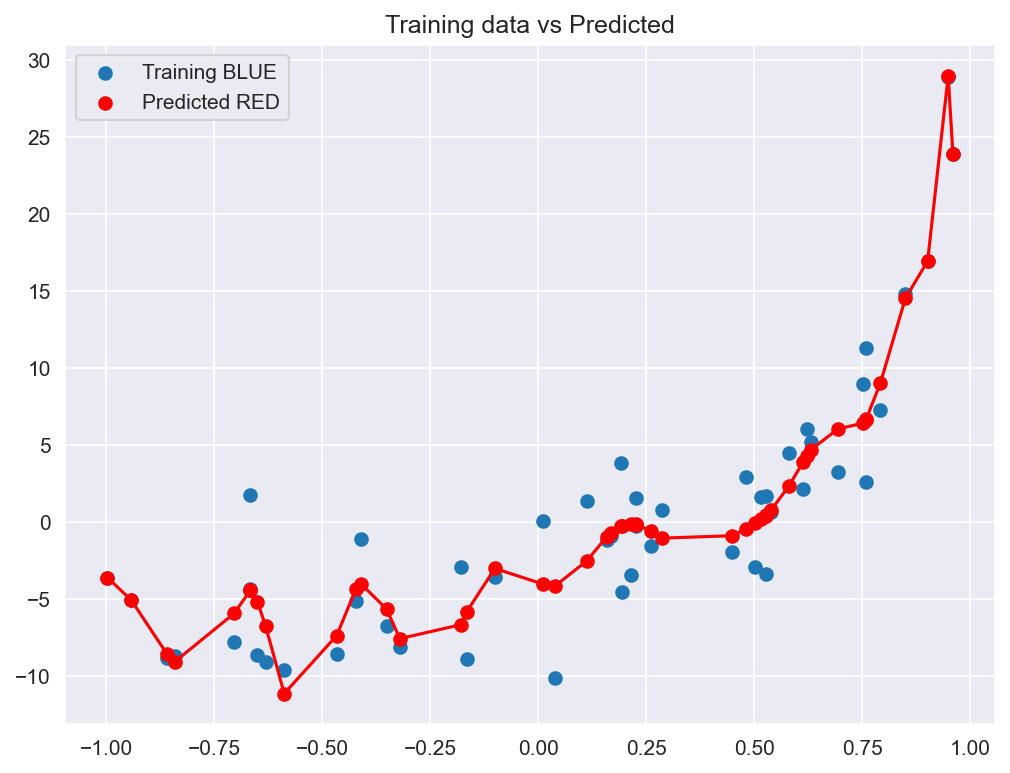

The MSE of the Training data is: 6.474680064998863


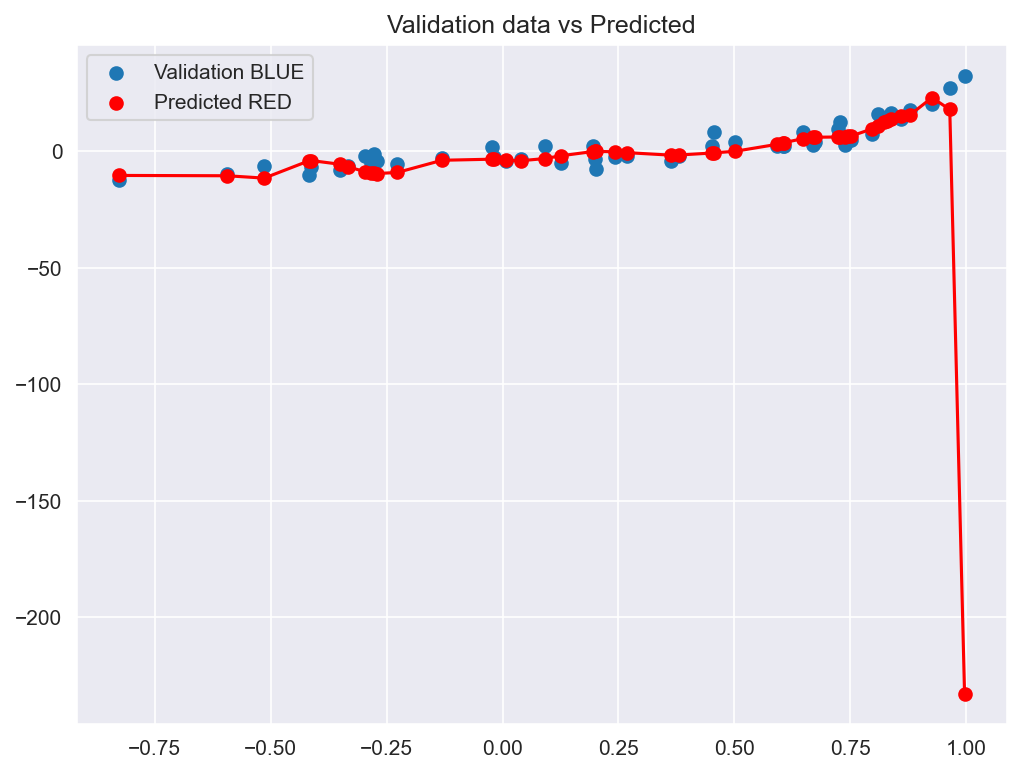

The MSE of the Validation data is: 1418.5143687802413


In [146]:
train_predicted = model.predict(poly_features(X_train))

plt.figure(figsize=(8, 6), dpi=150)
plt.scatter(X_train,Y_train, label = "Training BLUE")
plt.scatter(X_train,train_predicted, color = "r",label = "Predicted RED")
plt.plot(X_train,train_predicted,color = "r")
plt.title("Training data vs Predicted")
plt.legend()
plt.show()

print("The MSE of the Training data is:",mean_squared_error(Y_train,train_predicted))



valid_predicted = model.predict(poly_features(X_valid))

plt.figure(figsize=(8, 6), dpi=150)
plt.scatter(X_valid,Y_valid, label = "Validation BLUE")
plt.scatter(X_valid, valid_predicted, color = "r",label = "Predicted RED")
plt.plot(X_valid,valid_predicted,color = "r")
plt.title("Validation data vs Predicted")
plt.legend()

plt.show()
print("The MSE of the Validation data is:",mean_squared_error(Y_valid,valid_predicted))

In [147]:
model.coef_

array([[-1.54838532e+01,  1.55838699e+02,  1.90871415e+03,
        -7.74398741e+03, -3.57222246e+04,  1.27165132e+05,
         2.89950110e+05, -1.00166864e+06, -1.25374406e+06,
         4.38838678e+06,  3.15925024e+06, -1.14577838e+07,
        -4.78462777e+06,  1.82422715e+07,  4.28259629e+06,
        -1.73641577e+07, -2.08243121e+06,  9.07759174e+06,
         4.22697493e+05, -2.00438306e+06]])

The MSE of the Training data is:  22.144093782570877  With an Alpha of:  0
The MSE of the Validation data is:  21.291847981066454  With an Alpha of:  0
The MSE of the Training data is:  21.47839694207011  With an Alpha of:  0.005
The MSE of the Validation data is:  20.097428819937285  With an Alpha of:  0.005
The MSE of the Training data is:  21.47352720776478  With an Alpha of:  0.01
The MSE of the Validation data is:  19.63551098465204  With an Alpha of:  0.01
The MSE of the Training data is:  21.470872612758015  With an Alpha of:  0.015
The MSE of the Validation data is:  19.665957110028895  With an Alpha of:  0.015
The MSE of the Training data is:  21.490721973181422  With an Alpha of:  0.02
The MSE of the Validation data is:  19.690574268084756  With an Alpha of:  0.02
The MSE of the Training data is:  21.51042167591166  With an Alpha of:  0.025
The MSE of the Validation data is:  19.717000278423797  With an Alpha of:  0.025
The MSE of the Training data is:  21.53410956187525  Wit

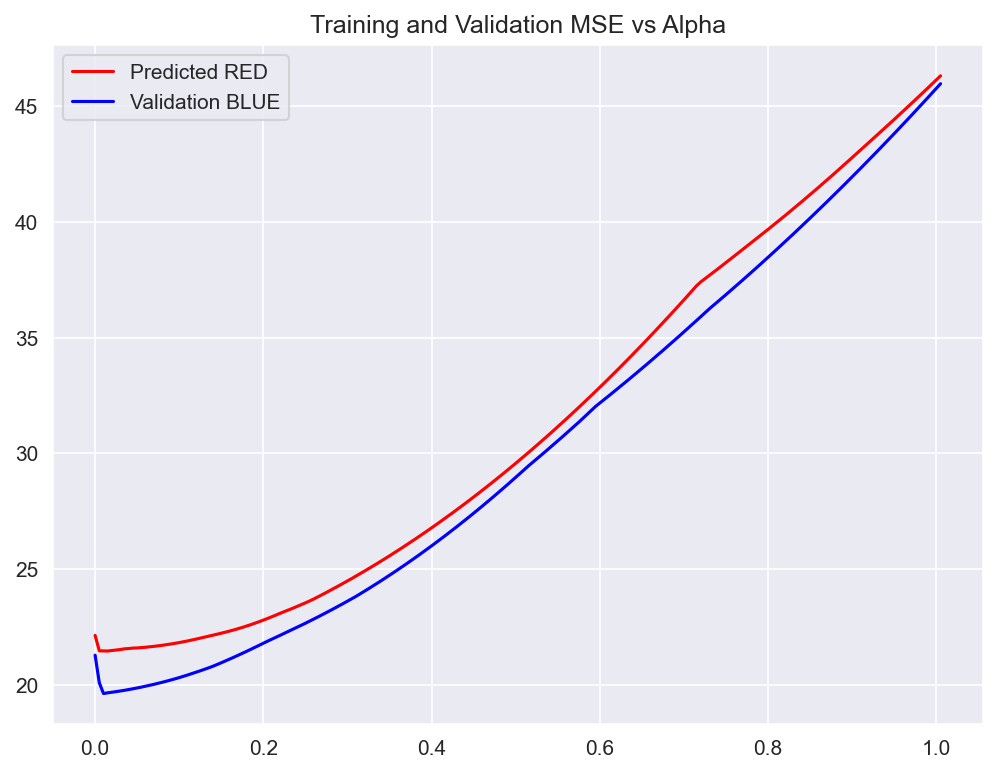

The lowest error of train was:  21.470872612758015 At alpha:  0.015
The lowest error of valid was:  19.63551098465204 At alpha:  0.01


In [148]:
from sklearn.linear_model import Lasso
from itertools import count

alphatracker = []
valid_errtracker,train_errtracker = [],[]

for alpha in count(0, 0.005):  # yields 11 times, a logical error!
    if alpha > 1.01: break

    lasso_reg = Lasso(alpha = alpha)
    lasso_reg.fit(modeltrainer,Y_train)
    y_lasso_poly_pred = lasso_reg.predict(poly_features(X_train))
    err = mean_squared_error(Y_valid,y_lasso_poly_pred)
    print("The MSE of the Training data is: ",err, " With an Alpha of: ",alpha)
    alphatracker.append(alpha)
    train_errtracker.append(err)

    lasso_reg.fit(poly_features(X_valid),Y_train)
    y_lasso_poly_pred = lasso_reg.predict(poly_features(X_valid))
    err = mean_squared_error(Y_valid,y_lasso_poly_pred)
    print("The MSE of the Validation data is: ",err, " With an Alpha of: ",alpha)
    valid_errtracker.append(err)

plt.figure(figsize=(8, 6), dpi=150)
plt.plot(alphatracker,train_errtracker, color = "r",label = "Predicted RED")
plt.plot(alphatracker,valid_errtracker,color="b",label = "Validation BLUE")
plt.title("Training and Validation MSE vs Alpha")
plt.legend()
plt.show()


mintrain_err = min(train_errtracker)
trainalpha = alphatracker[train_errtracker.index(min(train_errtracker))]

print("The lowest error of train was: ",mintrain_err ,"At alpha: ",trainalpha)


minvalid_err = min(valid_errtracker)
validalpha = alphatracker[valid_errtracker.index(min(valid_errtracker))]

print("The lowest error of valid was: ",minvalid_err ,"At alpha: ",validalpha)

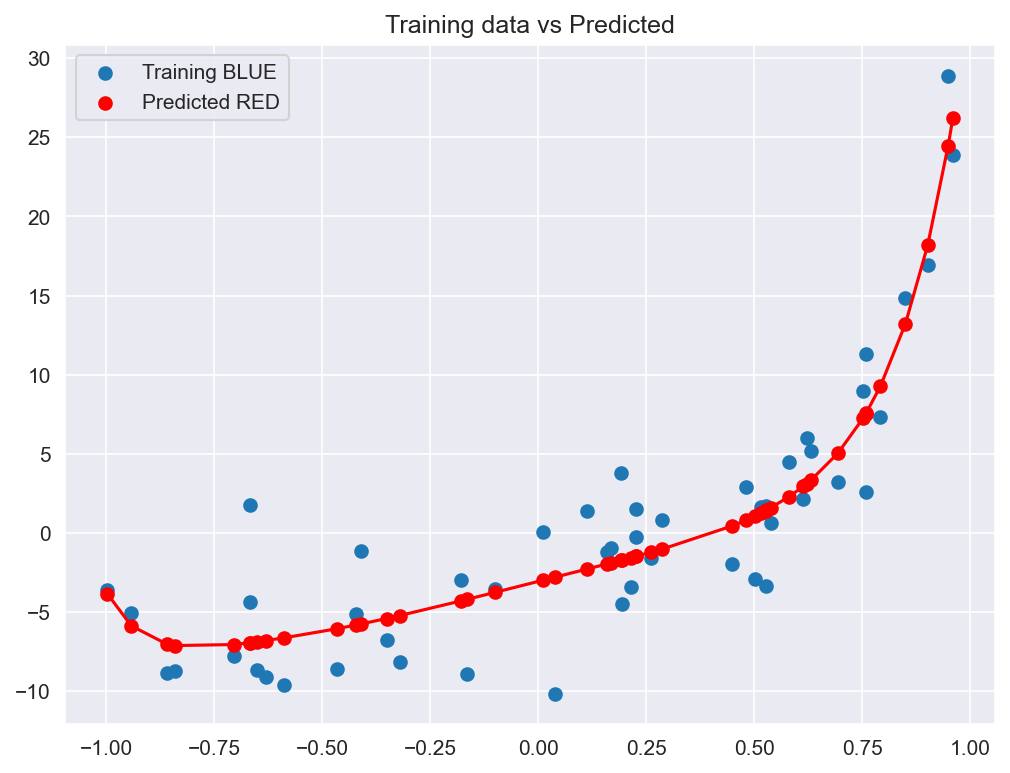

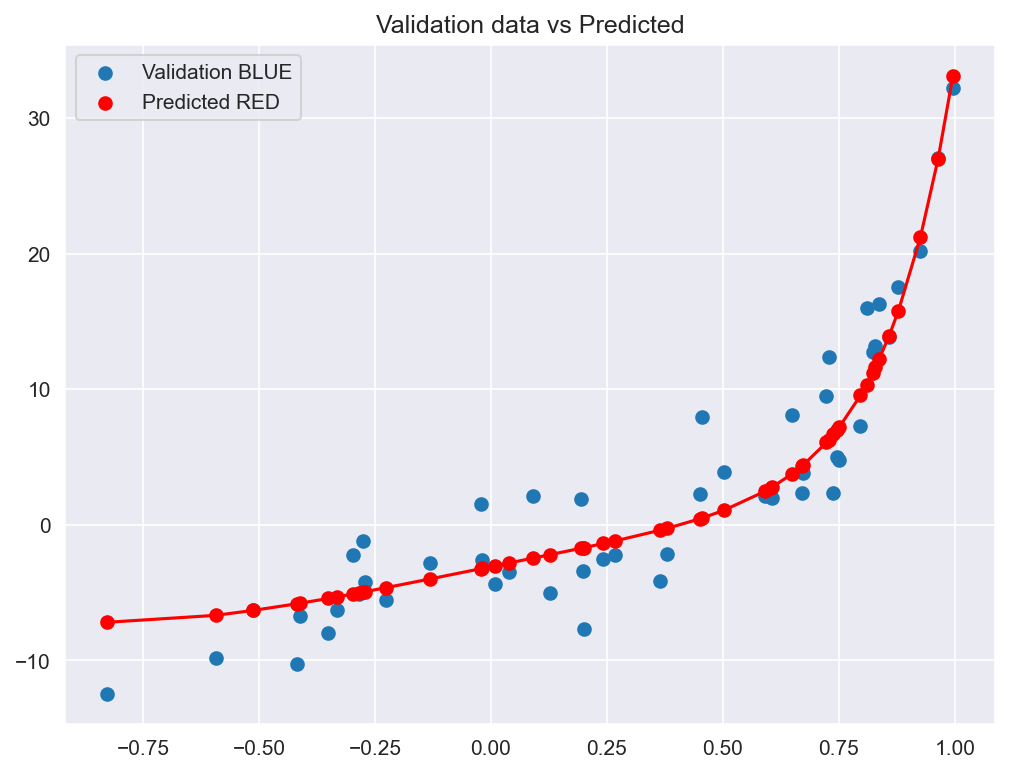

In [149]:
lasso_reg = Lasso(alpha = 0.017)
lasso_reg.fit(modeltrainer,Y_train)
y_lasso_poly_pred = lasso_reg.predict(poly_features(X_train))
plt.figure(figsize=(8, 6), dpi=150)
plt.scatter(X_train,Y_train, label = "Training BLUE")
plt.scatter(X_train,y_lasso_poly_pred, color = "r",label = "Predicted RED")
plt.plot(X_train,y_lasso_poly_pred,color = "r")
plt.title("Training data vs Predicted")
plt.legend()
plt.show()


y_lasso_poly_pred = lasso_reg.predict(poly_features(X_valid))
plt.figure(figsize=(8, 6), dpi=150)
plt.scatter(X_valid,Y_valid, label = "Validation BLUE")
plt.scatter(X_valid,y_lasso_poly_pred, color = "r",label = "Predicted RED")
plt.plot(X_valid,y_lasso_poly_pred,color = "r")
plt.title("Validation data vs Predicted")
plt.legend()
plt.show()

In [150]:
lasso_reg.coef_

array([6.92227315, 0.        , 0.        , 6.94576518, 3.75742417,
       2.3263995 , 8.11159188, 0.57735056, 0.        , 5.36978398,
       0.        , 2.96059271, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [151]:
from IPython.display import display, Math, Latex
display(Math(r'6.92x^{20}+6.94x^{17}+3.757x^{16}+2.33x^{15}+8.11x^{14}+0.58x^{13}+2.96'))

<IPython.core.display.Math object>

PART C Ridge

The MSE of the Training data is:  25.804002720000852  With an Alpha of:  0
The MSE of the Validation data is:  27.31680232264273  With an Alpha of:  0
The MSE of the Training data is:  22.0459617063183  With an Alpha of:  0.005
The MSE of the Validation data is:  20.790442468799725  With an Alpha of:  0.005
The MSE of the Training data is:  21.926287401040817  With an Alpha of:  0.01
The MSE of the Validation data is:  20.560439119593887  With an Alpha of:  0.01
The MSE of the Training data is:  21.838788862792722  With an Alpha of:  0.015
The MSE of the Validation data is:  20.39467334690867  With an Alpha of:  0.015
The MSE of the Training data is:  21.77240248599302  With an Alpha of:  0.02
The MSE of the Validation data is:  20.26815674687677  With an Alpha of:  0.02
The MSE of the Training data is:  21.72047589989872  With an Alpha of:  0.025
The MSE of the Validation data is:  20.1678736848947  With an Alpha of:  0.025
The MSE of the Training data is:  21.678823067476415  With an

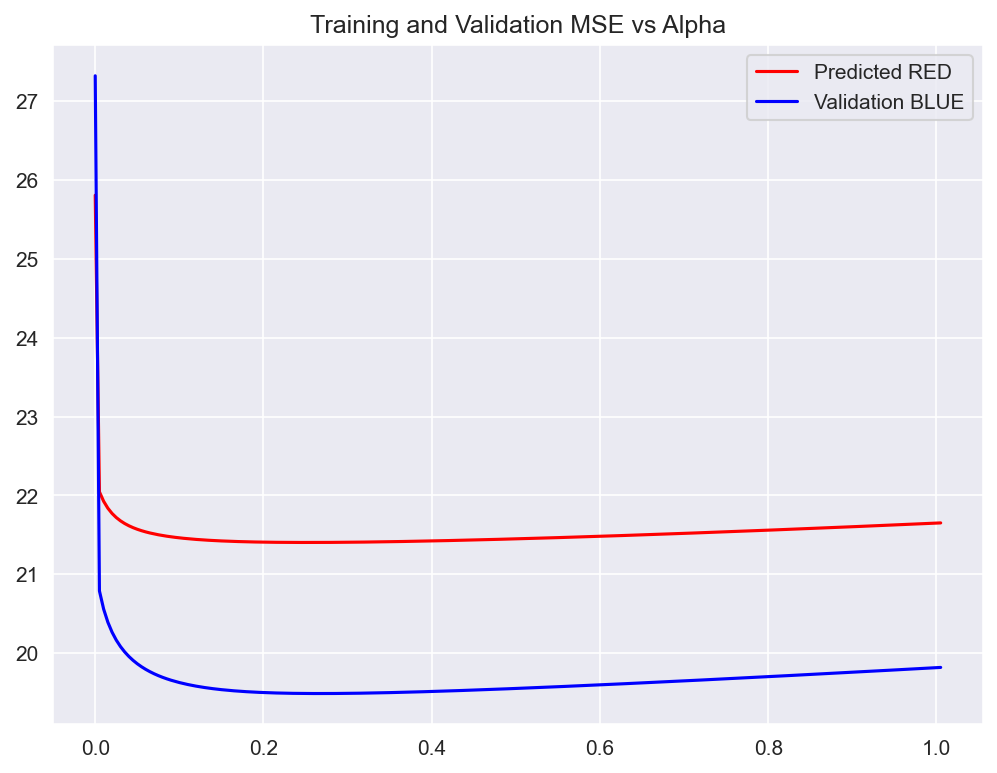

The lowest error of train was:  21.404700252523448 At alpha:  0.2500000000000001
The lowest error of valid was:  19.490810224668245 At alpha:  0.2650000000000001


In [152]:
from sklearn.linear_model import Ridge
from itertools import count

alphatracker = []
valid_errtracker,train_errtracker = [],[]

for alpha in count(0, 0.005):  # yields 11 times, a logical error!
    if alpha > 1.01: break

    lasso_reg = Ridge(alpha = alpha)
    lasso_reg.fit(modeltrainer,Y_train)
    y_lasso_poly_pred = lasso_reg.predict(poly_features(X_train))
    err = mean_squared_error(Y_valid,y_lasso_poly_pred)
    print("The MSE of the Training data is: ",err, " With an Alpha of: ",alpha)
    alphatracker.append(alpha)
    train_errtracker.append(err)

    lasso_reg.fit(poly_features(X_valid),Y_train)
    y_lasso_poly_pred = lasso_reg.predict(poly_features(X_valid))
    err = mean_squared_error(Y_valid,y_lasso_poly_pred)
    print("The MSE of the Validation data is: ",err, " With an Alpha of: ",alpha)
    valid_errtracker.append(err)

plt.figure(figsize=(8, 6), dpi=150)
plt.plot(alphatracker,train_errtracker, color = "r",label = "Predicted RED")
plt.plot(alphatracker,valid_errtracker,color="b",label = "Validation BLUE")
plt.title("Training and Validation MSE vs Alpha")
plt.legend()
plt.show()


mintrain_err = min(train_errtracker)
trainalpha = alphatracker[train_errtracker.index(min(train_errtracker))]

print("The lowest error of train was: ",mintrain_err ,"At alpha: ",trainalpha)


minvalid_err = min(valid_errtracker)
validalpha = alphatracker[valid_errtracker.index(min(valid_errtracker))]

print("The lowest error of valid was: ",minvalid_err ,"At alpha: ",validalpha)

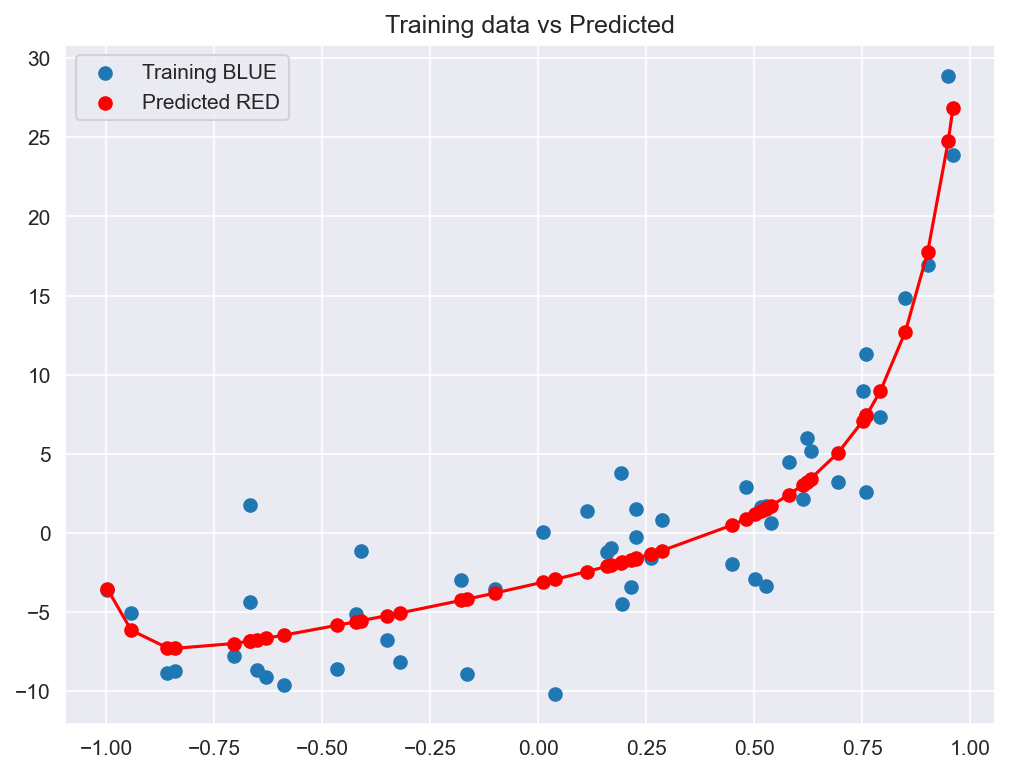

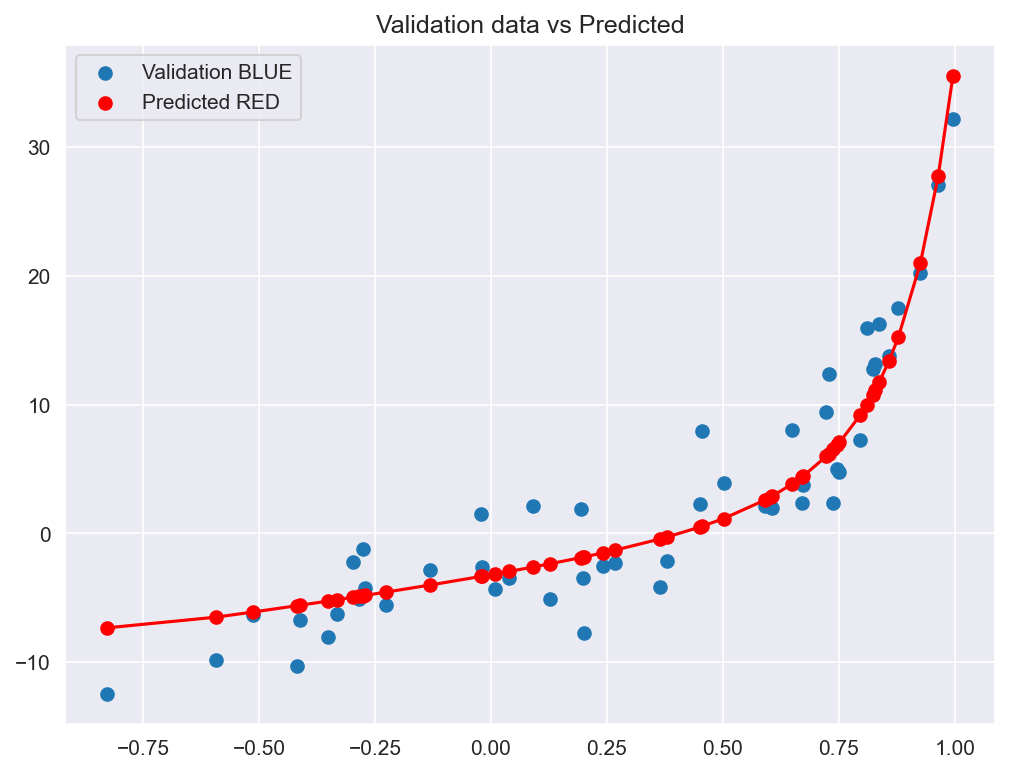

In [153]:
lasso_reg = Ridge(alpha = 0.256)
lasso_reg.fit(modeltrainer,Y_train)
y_lasso_poly_pred = lasso_reg.predict(poly_features(X_train))

plt.figure(figsize=(8, 6), dpi=150)
plt.scatter(X_train,Y_train, label = "Training BLUE")
plt.scatter(X_train,y_lasso_poly_pred, color = "r",label = "Predicted RED")
plt.plot(X_train,y_lasso_poly_pred,color = "r")
plt.title("Training data vs Predicted")
plt.legend()
plt.show()


y_lasso_poly_pred = lasso_reg.predict(poly_features(X_valid))

plt.figure(figsize=(8, 6), dpi=150)
plt.scatter(X_valid,Y_valid, label = "Validation BLUE")
plt.scatter(X_valid,y_lasso_poly_pred, color = "r",label = "Predicted RED")
plt.plot(X_valid,y_lasso_poly_pred,color = "r")
plt.title("Validation data vs Predicted")
plt.legend()
plt.show()

Part D Elastic

The MSE of the Training data is:  22.144093782570877  With an Alpha of:  0
The MSE of the Validation data is:  21.291847981066454  With an Alpha of:  0
The MSE of the Training data is:  21.427917413328696  With an Alpha of:  0.005
The MSE of the Validation data is:  19.52216513875205  With an Alpha of:  0.005
The MSE of the Training data is:  21.398072599222978  With an Alpha of:  0.01
The MSE of the Validation data is:  19.461413395086698  With an Alpha of:  0.01
The MSE of the Training data is:  21.414245868358286  With an Alpha of:  0.015
The MSE of the Validation data is:  19.565202508050927  With an Alpha of:  0.015
The MSE of the Training data is:  21.45198153116249  With an Alpha of:  0.02
The MSE of the Validation data is:  19.63120706966343  With an Alpha of:  0.02
The MSE of the Training data is:  21.503676756587215  With an Alpha of:  0.025
The MSE of the Validation data is:  19.698934229588524  With an Alpha of:  0.025
The MSE of the Training data is:  21.565494971975443  W

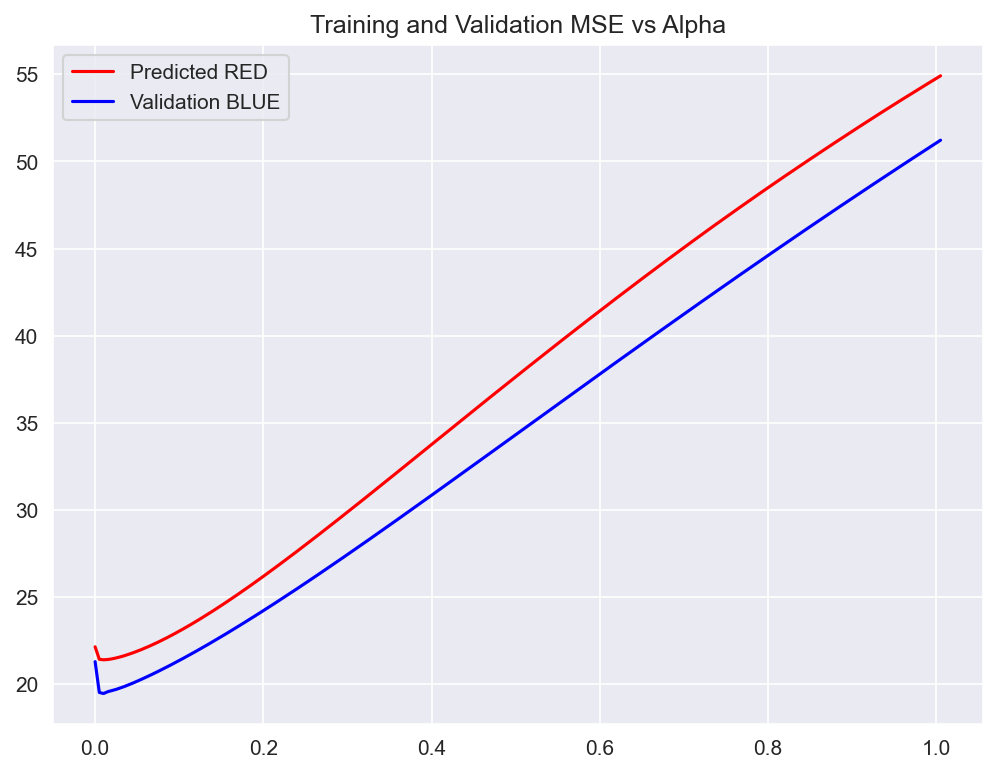

The lowest error of train was:  21.398072599222978 At alpha:  0.01
The lowest error of valid was:  19.461413395086698 At alpha:  0.01


In [154]:
from sklearn.linear_model import ElasticNet
from itertools import count

alphatracker = []
valid_errtracker,train_errtracker = [],[]

for alpha in count(0, 0.005):  # yields 11 times, a logical error!
    if alpha > 1.01: break

    lasso_reg = ElasticNet(alpha = alpha, l1_ratio=0.5)
    lasso_reg.fit(modeltrainer,Y_train)
    y_lasso_poly_pred = lasso_reg.predict(poly_features(X_train))
    err = mean_squared_error(Y_valid,y_lasso_poly_pred)
    print("The MSE of the Training data is: ",err, " With an Alpha of: ",alpha)
    alphatracker.append(alpha)
    train_errtracker.append(err)

    lasso_reg.fit(poly_features(X_valid),Y_train)
    y_lasso_poly_pred = lasso_reg.predict(poly_features(X_valid))
    err = mean_squared_error(Y_valid,y_lasso_poly_pred)
    print("The MSE of the Validation data is: ",err, " With an Alpha of: ",alpha)
    valid_errtracker.append(err)

plt.figure(figsize=(8, 6), dpi=150)
plt.plot(alphatracker,train_errtracker, color = "r",label = "Predicted RED")
plt.plot(alphatracker,valid_errtracker,color="b",label = "Validation BLUE")
plt.title("Training and Validation MSE vs Alpha")
plt.legend()
plt.show()


mintrain_err = min(train_errtracker)
trainalpha = alphatracker[train_errtracker.index(min(train_errtracker))]

print("The lowest error of train was: ",mintrain_err ,"At alpha: ",trainalpha)


minvalid_err = min(valid_errtracker)
validalpha = alphatracker[valid_errtracker.index(min(valid_errtracker))]

print("The lowest error of valid was: ",minvalid_err ,"At alpha: ",validalpha)

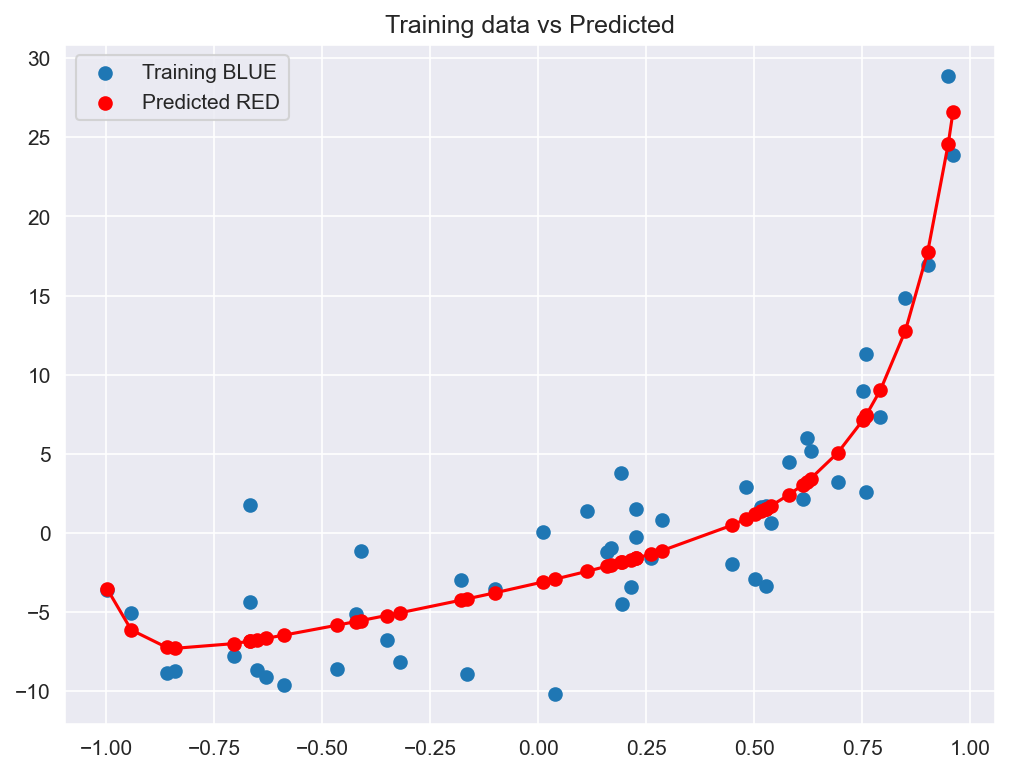

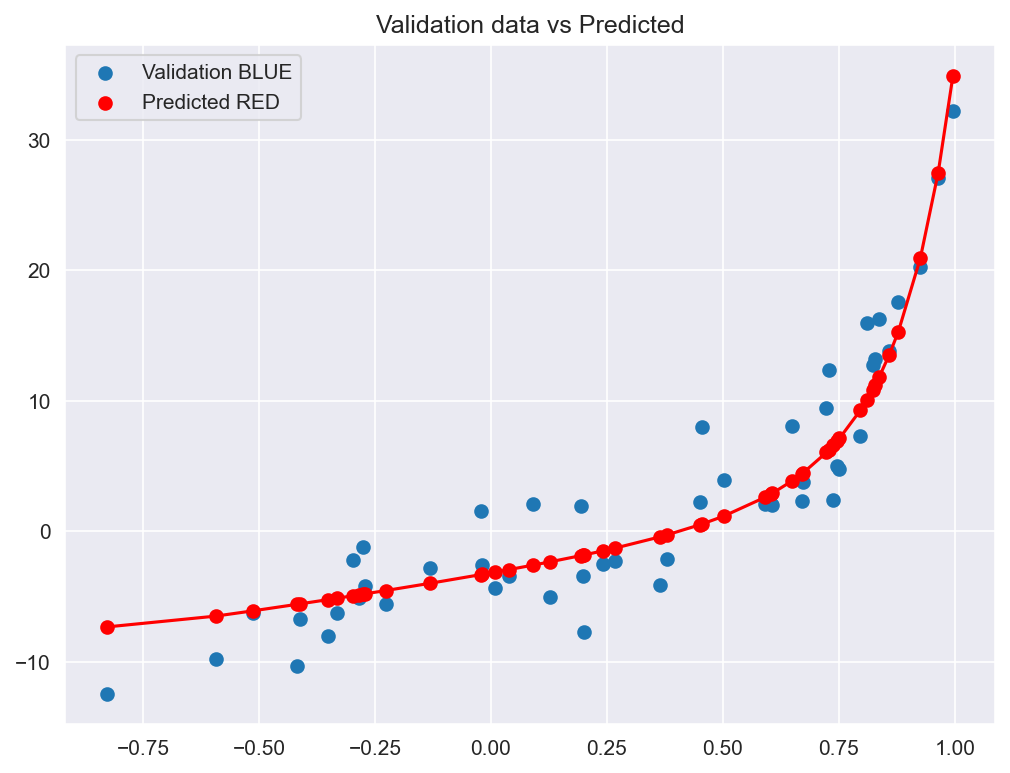

In [155]:
lasso_reg = ElasticNet(alpha = 0.01)
lasso_reg.fit(modeltrainer,Y_train)
y_lasso_poly_pred = lasso_reg.predict(poly_features(X_train))

plt.figure(figsize=(8, 6), dpi=150)
plt.scatter(X_train,Y_train, label = "Training BLUE")
plt.scatter(X_train,y_lasso_poly_pred, color = "r",label = "Predicted RED")
plt.plot(X_train,y_lasso_poly_pred,color = "r")
plt.title("Training data vs Predicted")
plt.legend()
plt.show()


y_lasso_poly_pred = lasso_reg.predict(poly_features(X_valid))

plt.figure(figsize=(8, 6), dpi=150)
plt.scatter(X_valid,Y_valid, label = "Validation BLUE")
plt.scatter(X_valid,y_lasso_poly_pred, color = "r",label = "Predicted RED")
plt.plot(X_valid,y_lasso_poly_pred,color = "r")
plt.title("Validation data vs Predicted")
plt.legend()
plt.show()